In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
%run ../common/SKL_GPR.py
%run ../common/homemade_BO.py
np.random.seed(seed=123)

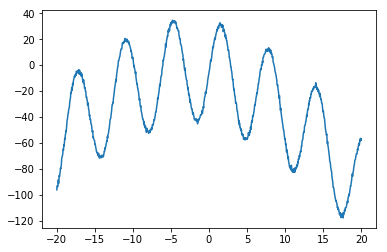

In [2]:
#Define data, supervised data
def x2y(x):
    f = 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
    return f
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
y = list(map(x2y,x)) #for python3
y = np.array(y)
plt.plot(x, y) #### plot true data
plt.show()

In [3]:
#Define GPR and Bayesian opt.
Noptimize = 100
#kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.RBF()
kernel = kernels.RBF()
#kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.Matern(nu=0.5)
#kernel = kernels.Matern(nu=0.5)
GPR = Gaussian_Process_Regression(kernel=kernel, alpha=1e-8, normalize_y=True, optimizer='fmin_l_bfgs_b', \
                                   copy_X_train=True, n_restarts_optimizer=Noptimize, random_state=123)
#
BO = Bayesian_opt()
#BO.acqui_name = 'EI'
#BO.acqui_name = 'PI'
BO.acqui_name = 'UCB'
print('# The choice of acquisition function: ',BO.acqui_name)

# The choice of acquisition function:  UCB


epoch =  0 , x_point, maxval = -20.0,  10.752429826046175
epoch =  1 , x_point, maxval = 1.9819819819819813,  26.339501315902552
epoch =  2 , x_point, maxval = -8.588588588588589,  26.339501315902552
epoch =  3 , x_point, maxval = 20.0,  26.339501315902552
epoch =  4 , x_point, maxval = -14.114114114114114,  26.339501315902552
epoch =  5 , x_point, maxval = -3.343343343343342,  26.339501315902552
epoch =  6 , x_point, maxval = 16.436436436436438,  26.339501315902552
epoch =  7 , x_point, maxval = 4.784784784784783,  26.339501315902552
epoch =  8 , x_point, maxval = -0.7007007007007005,  26.339501315902552
epoch =  9 , x_point, maxval = 13.273273273273276,  26.339501315902552
epoch =  10 , x_point, maxval = -16.996996996996998,  26.339501315902552
epoch =  11 , x_point, maxval = -5.945945945945946,  26.339501315902552
epoch =  12 , x_point, maxval = -11.31131131131131,  26.339501315902552
epoch =  13 , x_point, maxval = 18.3983983983984,  26.339501315902552
epoch =  14 , x_point, maxval

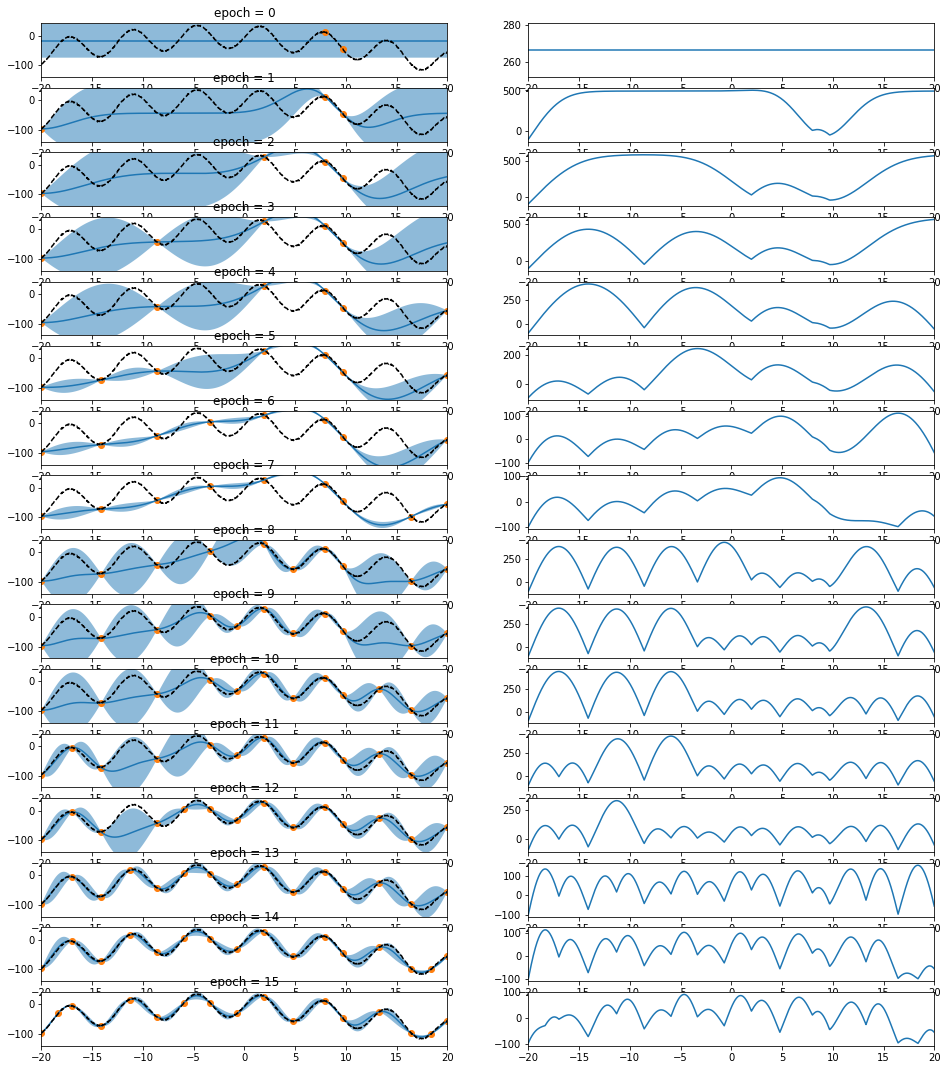

# Actual value of maximum is [34.65978763]
# Got value in the Bayesian_opt is 26.339501315902552
# Optimization is finished.


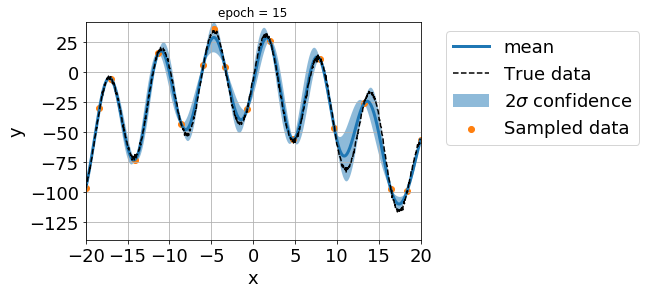

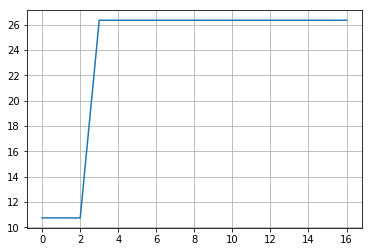

In [4]:
#Definition of array as the initial condition
x_sample_init = np.array([])
y_sample_init = np.array([])
Ninitial = 2
for i in range(Ninitial):
    x_point = np.random.uniform(xmin,xmax) #Initial point is randomely chosen
    x_sample_init = np.append(x_sample_init,x_point) 
    y_point = x2y(x_point) 
    y_sample_init = np.append(y_sample_init,y_point) 
#
Nepoch = 16 #Number of optimization
nplotevery = Nepoch//16 #Plot the results in every this number

mean, std, x_point, y_point, maxval_list = DO_BO(GPR, BO, x2y, x, x_sample_init, y_sample_init, Nepoch, nplotevery, answer_is_there=True)

plt.figure()
plt.plot(maxval_list)
plt.grid()
plt.show()